In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set_context("notebook")
sns.set(style="whitegrid")

# 2014 expenditure the US spent on foreign aid. 
# Found here: https://explorer.usaid.gov/query
long_aid = pd.read_excel('data/2000_2014_foreign_aid.xlsx')
aid = long_aid[long_aid.fiscal_year == 2014]

for attribute in aid:
    print attribute

country_code
country_name
region_name
income_group_name
implementing_agency_name
channel_category_name
dac_category_name
dac_sector_name
dac_purpose_name
funding_agency_name
assistance_category_name
activity_name
activity_start_date
activity_end_date
transaction_type_name
fiscal_year
current_amount
constant_amount
numeric_year


In [38]:
# Let's look at the development assistance committee categories
categories = aid['dac_category_name'].unique()

In [39]:
def total_costs(dataframe, region_label, cost_label):
    costs = {}
    for index,row in dataframe.iterrows():
        region = row[region_label]
        cost = row[cost_label]
        if cost >= 0:
            if region in costs:
                costs[region] += cost
            else:
                costs[region] = cost
    return costs

def costs_of(df, category, region_label, cost_label):
    aid_category = df[df.dac_category_name == category]
    return total_costs(aid_category, region_label, cost_label)

def dict_to_df(dictionary, cols):
    return pd.DataFrame(dictionary.items(), columns=cols)

totals = total_costs(aid, 'dac_category_name', 'constant_amount')
totals_df = dict_to_df(totals, ['Category', 'Cost'])
totals_df

,Category,Cost
0,Economic Growth,1.475500e+09
1,Commodity Assistance,7.191740e+08
2,Infrastructure,1.685262e+09
3,Health and Population,1.940597e+10
4,Humanitarian,1.190496e+10
5,Governance,6.790337e+09
6,Other,1.190465e+10
7,Education,2.090078e+09
8,Agriculture,2.535445e+09


In [40]:
totals_df.to_csv('data/totals.csv', index=False)

In [41]:
years = range(2000,2015)

year_totals = {}
for year in years:
    year_totals[year] = total_costs(long_aid[long_aid.fiscal_year == year], 'dac_category_name', 'constant_amount')


In [42]:
year_totals_df = pd.DataFrame.from_dict(year_totals)

year_totals_dfs = {}
for year in year_totals:
    year_totals_dfs[year] = dict_to_df(year_totals[year], ['Expenditure', 'Cost'])
    
year_totals_df = pd.concat(year_totals_dfs)
year_totals_df['Year'] = year_totals_df.index.get_level_values(0)
year_totals_df.to_csv('data/year_totals.csv', index=False)
print(year_totals_df.columns)

Index([u'Expenditure', u'Cost', u'Year'], dtype='object')


In [43]:
country_costs = {}
for category in categories:
    country_costs[category] = costs_of(aid, category, 'country_name', 'constant_amount')
    
country_costs_df = pd.DataFrame.from_dict(country_costs)
country_costs_df.index.name = 'Country'
country_costs_df = country_costs_df.reset_index(level=0)

regions = {}
for index,row in aid.iterrows():
    region = row['region_name']
    country = row['country_name']
    regions[country] = region

country_costs_df['Region'] = country_costs_df['Country']
country_costs_df['Region'] = country_costs_df['Region'].replace(regions)
country_costs_df 


,Country,Agriculture,Commodity Assistance,Economic Growth,Education,Governance,Health and Population,Humanitarian,Infrastructure,Other,Region
0,Afghanistan,1.976950e+08,8.638306e+05,1.849758e+08,2.871322e+08,1.266806e+09,1.986964e+08,3.885368e+08,4.677469e+08,3.471415e+08,South and Central Asia
1,Albania,NaN,NaN,5.657506e+06,1.003898e+06,2.183025e+07,1.109404e+06,NaN,1.034075e+06,9.384768e+06,Europe and Eurasia
2,Algeria,NaN,NaN,NaN,NaN,2.031292e+05,NaN,1.370466e+07,4.926259e+05,NaN,Middle East and North Africa
3,Angola,1.836293e+03,NaN,1.267785e+06,9.612906e+05,2.598076e+06,8.504145e+07,9.681239e+06,4.123279e+05,1.226135e+07,Sub-Saharan Africa
4,Argentina,3.386606e+05,NaN,6.248782e+05,NaN,9.359892e+03,6.082255e+04,NaN,NaN,4.602545e+05,Western Hemisphere
5,Armenia,NaN,1.476902e+05,1.604555e+07,2.717406e+06,3.018401e+07,6.909769e+06,8.172420e+05,1.286178e+05,1.032673e+07,Europe and Eurasia
6,Asia Region,1.730555e+06,9.410217e+05,3.813249e+06,1.472429e+07,3.611652e+06,5.962107e+07,4.781824e+05,9.588318e+05,3.965617e+08,World
7,"Asia, Middle East and North Africa Region",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.520396e+04,NaN,World
8,Azerbaijan,3.694842e+03,NaN,5.561683e+06,2.807921e+06,1.557551e+07,2.031289e+05,3.910863e+05,5.837923e+05,7.879799e+06,Europe and Eurasia
9,Bahrain,NaN,NaN,NaN,NaN,9.476477e+05,NaN,NaN,NaN,NaN,Middle East and North Africa


In [44]:
country_costs_df.columns = ['2014 ' + col for col in country_costs_df.columns]
country_costs_df = country_costs_df.rename(columns={'2014 Country': 'Country', '2014 Region': 'Region'})

country_costs_df

,Country,2014 Agriculture,2014 Commodity Assistance,2014 Economic Growth,2014 Education,2014 Governance,2014 Health and Population,2014 Humanitarian,2014 Infrastructure,2014 Other,Region
0,Afghanistan,1.976950e+08,8.638306e+05,1.849758e+08,2.871322e+08,1.266806e+09,1.986964e+08,3.885368e+08,4.677469e+08,3.471415e+08,South and Central Asia
1,Albania,NaN,NaN,5.657506e+06,1.003898e+06,2.183025e+07,1.109404e+06,NaN,1.034075e+06,9.384768e+06,Europe and Eurasia
2,Algeria,NaN,NaN,NaN,NaN,2.031292e+05,NaN,1.370466e+07,4.926259e+05,NaN,Middle East and North Africa
3,Angola,1.836293e+03,NaN,1.267785e+06,9.612906e+05,2.598076e+06,8.504145e+07,9.681239e+06,4.123279e+05,1.226135e+07,Sub-Saharan Africa
4,Argentina,3.386606e+05,NaN,6.248782e+05,NaN,9.359892e+03,6.082255e+04,NaN,NaN,4.602545e+05,Western Hemisphere
5,Armenia,NaN,1.476902e+05,1.604555e+07,2.717406e+06,3.018401e+07,6.909769e+06,8.172420e+05,1.286178e+05,1.032673e+07,Europe and Eurasia
6,Asia Region,1.730555e+06,9.410217e+05,3.813249e+06,1.472429e+07,3.611652e+06,5.962107e+07,4.781824e+05,9.588318e+05,3.965617e+08,World
7,"Asia, Middle East and North Africa Region",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.520396e+04,NaN,World
8,Azerbaijan,3.694842e+03,NaN,5.561683e+06,2.807921e+06,1.557551e+07,2.031289e+05,3.910863e+05,5.837923e+05,7.879799e+06,Europe and Eurasia
9,Bahrain,NaN,NaN,NaN,NaN,9.476477e+05,NaN,NaN,NaN,NaN,Middle East and North Africa


In [53]:
span_country_costs = {}
for category in categories:
    span_country_costs[category] = costs_of(long_aid, category, 'country_name', 'constant_amount')
    
span_country_costs_df = pd.DataFrame.from_dict(span_country_costs)
span_country_costs_df.index.name = 'Country'
span_country_costs_df = span_country_costs_df.reset_index(level=0)

span_regions = {}
for index,row in long_aid.iterrows():
    span_region = row['region_name']
    span_country = row['country_name']
    span_regions[span_country] = span_region

span_country_costs_df['Region'] = span_country_costs_df['Country']
span_country_costs_df['Region'] = span_country_costs_df['Region'].replace(regions)




In [55]:
def to_int(x):
    if np.isnan(x):
        return np.nan
    else:
        return int(x)
span_country_costs_df[categories] = span_country_costs_df[categories].applymap(to_int)
span_country_costs_df

,Country,Agriculture,Commodity Assistance,Economic Growth,Education,Governance,Health and Population,Humanitarian,Infrastructure,Other,Region
0,Afghanistan,3944025380,684805776,4790284957,2516267153,1.137418e+11,2686194196,4238524384,11287213390,3569695808,South and Central Asia
1,Albania,21044888,44250961,219618434,7340413,5.499558e+08,99872995,30664544,38112952,396187924,Europe and Eurasia
2,Algeria,3259,9489125,6484213,NaN,5.615806e+07,1191609,137822424,6421871,1182031,Middle East and North Africa
3,Angola,19446599,190518493,21393108,8830197,4.262185e+08,828073680,1037871070,4988815,136669730,Sub-Saharan Africa
4,Anguilla,40000,NaN,NaN,NaN,1.620000e+02,NaN,NaN,NaN,NaN,Anguilla
5,Antigua and Barbuda,NaN,NaN,13892,NaN,2.912464e+07,NaN,453243,NaN,454709,Antigua and Barbuda
6,Argentina,3874494,NaN,11254183,763689,1.095558e+08,1358484,558812,21354318,9396659,Western Hemisphere
7,Armenia,396583787,64888900,138665195,28563704,1.145387e+09,192567391,41556110,225157088,762001777,Europe and Eurasia
8,Aruba,NaN,NaN,50863,NaN,2.971420e+05,NaN,NaN,NaN,NaN,Aruba
9,Asia Region,11448491,1941021,73668330,47184284,1.383104e+08,383026941,85824881,17250086,4336707061,World


In [72]:
cats = ['Agriculture',
 'Commodity Assistance',
 'Economic Growth',
 'Education',
 'Governance',
 'Health and Population',
 'Humanitarian',
 'Infrastructure',
 'Other']
def totals_for_cats(df):
    spending = {}
    for index, row in df.iterrows():
        cat = row['dac_category_name']
        code = row['country_code']
        if cat in cats and code != 'WLD' and code != '':
            name = row['country_name']
            amount = row['constant_amount']
            if amount >= 0:
                if code in spending:
                    spending[code]['2014 ' + cat] += amount
                else:
                    spending[code] = {'name': name}
                    for c in cats:
                        spending[code]['2014 ' + c] = 0
                    spending[code]['2014 ' + cat] = amount
    return spending

In [73]:
aid = aid.dropna(axis=0, subset=['country_code'])
totalsEachCat = totals_for_cats(aid)

In [75]:
totalsdf = pd.DataFrame.from_dict(totalsEachCat, orient='index')
totalsdf.to_csv('data/aid_FY2014_condensed.csv', encoding='utf-8')

In [47]:
span_country_costs_df.columns = ['2000-2014 ' + col for col in span_country_costs_df.columns]

In [48]:
span_country_costs_df = span_country_costs_df.drop('2000-2014 Region', 1)
span_country_costs_df = span_country_costs_df.rename( columns={'2000-2014 Country': 'Country'})


In [49]:
span_country_costs_df

,Country,2000-2014 Agriculture,2000-2014 Commodity Assistance,2000-2014 Economic Growth,2000-2014 Education,2000-2014 Governance,2000-2014 Health and Population,2000-2014 Humanitarian,2000-2014 Infrastructure,2000-2014 Other
0,Afghanistan,3944025380,684805776,4790284957,2516267153,1.137418e+11,2686194196,4238524384,11287213390,3569695808
1,Albania,21044888,44250961,219618434,7340413,5.499558e+08,99872995,30664544,38112952,396187924
2,Algeria,3259,9489125,6484213,NaN,5.615806e+07,1191609,137822424,6421871,1182031
3,Angola,19446599,190518493,21393108,8830197,4.262185e+08,828073680,1037871070,4988815,136669730
4,Anguilla,40000,NaN,NaN,NaN,1.620000e+02,NaN,NaN,NaN,NaN
5,Antigua and Barbuda,NaN,NaN,13892,NaN,2.912464e+07,NaN,453243,NaN,454709
6,Argentina,3874494,NaN,11254183,763689,1.095558e+08,1358484,558812,21354318,9396659
7,Armenia,396583787,64888900,138665195,28563704,1.145387e+09,192567391,41556110,225157088,762001777
8,Aruba,NaN,NaN,50863,NaN,2.971420e+05,NaN,NaN,NaN,NaN
9,Asia Region,11448491,1941021,73668330,47184284,1.383104e+08,383026941,85824881,17250086,4336707061


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


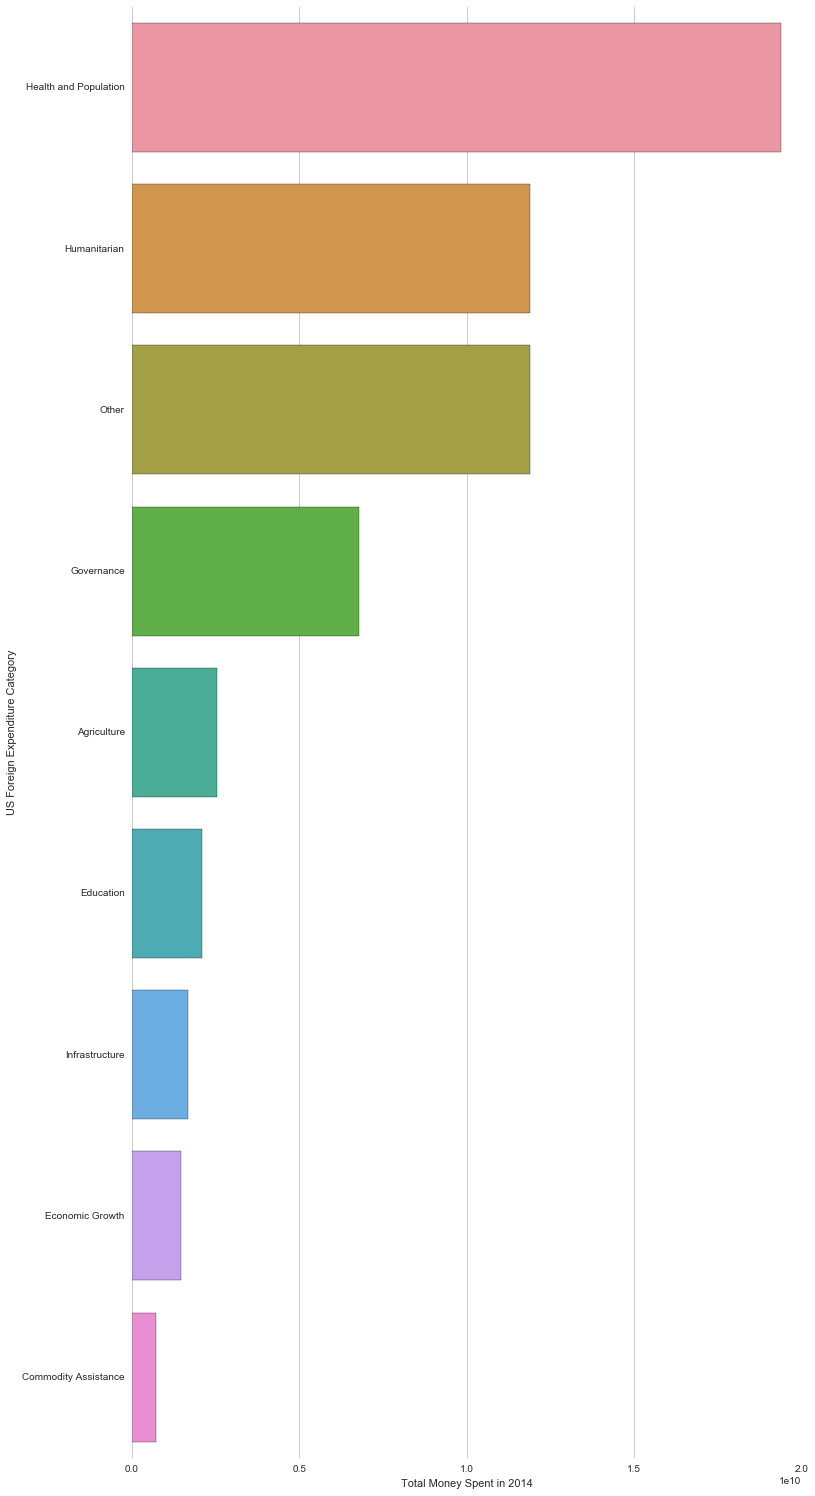

In [24]:
def plot_costs(costs, x, y, xlabel, ylabel):
    plt.figure(figsize=(12, 26))
    cost_plot = sns.barplot(data=costs.sort(x, ascending=False), x=x, y=y)
    cost_plot.set(xlabel=xlabel, ylabel=ylabel)
    sns.despine(left=True, bottom=True)


plot_costs(totals_df, 'Cost', 'Category', 'Total Money Spent in 2014', 'US Foreign Expenditure Category')

In [25]:
hdr = pd.read_excel('data/HDR.xlsx')
hdr

,Country,2000 Life Expectancy,2013 Life Expectancy,2000-2013 Life Expectancy Increase,2000 Education Index,2013 Education Index,2000-2013 Education Index Increase,2000 Mean Years of Schooling,2013 Mean Years of Schooling,2000-2013 Mean Years of Schooling Increase,2000 Income Index,2013 Income Index,2000-2013 Income Index Increase,2000 GNI per Capita,2013 GNI per Capita,2000-2013 GNI per Capita Increase,2000 HDI,2013 HDI,2000-2013 HDI Increase
0,Afghanistan,54.9,60.9,6.0,0.225522,0.365333,0.139811,2.1,3.2,1.1,0.328,0.445,0.117,877,1904,1027,0.341,0.468,0.127
1,Albania,74.2,77.4,3.2,0.565465,0.608519,0.043054,8.5,9.3,0.8,0.596,0.683,0.087,5185,9225,4040,0.655,0.716,0.061
2,Algeria,69.0,71.0,2.0,0.493489,0.642589,0.149100,5.9,7.6,1.7,0.686,0.730,0.044,9378,12555,3177,0.634,0.717,0.083
3,Andorra,78.9,81.2,2.3,NaN,0.670287,NaN,NaN,10.4,NaN,0.867,0.907,0.040,31171,40597,9426,NaN,0.830,NaN
4,Angola,45.2,51.9,6.7,0.298712,0.474212,0.175500,4.4,4.7,0.3,0.461,0.626,0.165,2117,6323,4206,0.377,0.526,0.149
5,Antigua and Barbuda,73.5,76.0,2.5,NaN,0.681141,NaN,NaN,8.9,NaN,0.750,0.791,0.041,14289,18800,4511,NaN,0.774,NaN
6,Argentina,73.8,76.3,2.5,0.710665,0.783356,0.072690,9.1,9.8,0.7,0.724,0.778,0.054,12088,17297,5209,0.753,0.808,0.055
7,Armenia,71.5,74.6,3.1,0.668267,0.701367,0.033100,10.8,10.8,0.0,0.514,0.661,0.147,3004,7952,4948,0.648,0.730,0.082
8,Australia,79.6,82.5,2.9,0.895400,0.926536,0.031136,11.9,12.8,0.9,0.881,0.911,0.030,34148,41524,7376,0.898,0.933,0.035
9,Austria,78.1,81.1,3.0,0.729521,0.794481,0.064960,9.1,10.8,1.7,0.894,0.916,0.022,37079,42930,5851,0.835,0.881,0.046


In [26]:
populations = pd.read_csv('data/2014_populations.csv')
foreign_aid = pd.merge(hdr,country_costs_df, on='Country', how='outer')
foreign_aid = pd.merge(foreign_aid,span_country_costs_df, on='Country', how='outer')
foreign_aid = foreign_aid.rename(columns={'Region_y': 'Region'})

for category in ['2014 ' + cat for cat in categories]:
    foreign_aid[category] = foreign_aid[category].fillna(0)
    
for category in ['2000-2014 ' + cat for cat in categories]:
    foreign_aid[category] = foreign_aid[category].fillna(0)


foreign_aid = pd.merge(foreign_aid, populations, on='Country', how='outer')
foreign_aid = foreign_aid.dropna(subset=['2013 Life Expectancy'])


foreign_aid.ix[foreign_aid.Country==u"C\xf4te d'Ivoire", 'Country'] = "Ivory Coast"


In [27]:
europe = 'Europe and Eurasia'
asia = 'East Asia and Oceania'
n_america = 'North America'
s_america = 'South and Central America'
middle_east = 'Middle East and North Africa'
s_africa = 'Sub-Saharan Africa'
regions = dict(zip(foreign_aid.Country, foreign_aid.Region))



In [28]:


for country in regions:
    if regions[country] == 'Europe and Eurasia':
        regions[country] = europe
    if regions[country] == 'East Asia and Oceania':
        regions[country] = asia
    if regions[country] == 'Western Hemisphere':
        regions[country] = s_america

regions['Australia'] = asia
regions['New Zealand'] = asia
regions['Korea'] = asia
regions['China'] = asia
regions['Austria'] = europe
regions['Belgium'] = europe
regions['Bolivia'] = s_america
regions['Burma'] = asia
regions['Ceylon'] = asia
regions['Czechoslovakia'] = europe
regions['Dominican Rep'] = s_america
regions['France'] = europe
regions['Iran'] = middle_east
regions['Italy'] = europe
regions['Laos'] = asia
regions['Malaya'] = asia
regions['Portugal'] = europe
regions['Saudi Arabia'] = middle_east
regions['Spain'] = europe
regions['Syria'] = middle_east
regions['South Africa'] = s_africa
regions['United states'] = n_america
regions['Canada'] = n_america
regions['Venezuala'] = s_america
regions['Germany'] = europe
regions['Yugoslavia'] = europe

regions['Andorra'] = europe
regions['Antigua and Barbuda'] = s_america
regions['Bahamas'] = s_america
regions['Bolivia (Plurinational State of)'] = s_america
regions['Brunei Darussalam'] = asia
regions['Cape Verde'] = s_africa
regions['Congo'] = s_africa
regions['Congo (Democratic Republic of the)'] = s_africa
regions['Ivory Coast'] = s_africa
regions['Denmark'] = europe
regions['Dominica'] = s_america
regions['Equatorial Guinea'] = s_africa
regions['Eritrea'] = middle_east
regions['Finland'] = europe
regions['Grenada'] = s_america
regions['Guinea-Bissau'] = s_africa
regions['Hong Kong, China (SAR)'] = asia
regions['Iceland'] = europe
regions['Iran (Islamic Republic of)'] = middle_east
regions['Kiribati'] = asia
regions['Korea (Republic of)'] = asia
regions['Kuwait'] = middle_east
regions['Lao People\'s Democratic Republic'] = asia
regions['Latvia'] = europe
regions['Liechtenstein'] = europe
regions['Lithuania'] = europe
regions['Luxembourg'] = europe
regions['Micronesia (Federated States of)'] = asia
regions['Moldova (Republic of)'] = europe
regions['Myanmar'] = middle_east
regions['Netherlands'] = europe
regions['Norway'] = europe
regions['Palestine, State of'] = middle_east
regions['Poland'] = europe
regions['Qatar'] = middle_east
regions['Russian Federation'] = europe
regions['Saint Kitts and Nevis'] = s_america
regions['Saint Lucia'] = s_america
regions['Saint Vincent and the Grenadines'] = s_america
regions['Singapore'] = asia
regions['Slovakia'] = europe
regions['Slovenia'] = europe
regions['Suriname'] = s_america
regions['Sweden'] = europe
regions['Syrian Arab Republic'] = middle_east
regions['Tanzania (United Republic of)'] = s_africa
regions['The former Yugoslav Republic of Macedonia'] = europe
regions['United Arab Emirates'] = middle_east
regions['United Kingdom'] = europe
regions['United States'] = n_america
regions['Canada'] = n_america
regions['Venezuela (Bolivarian Republic of)'] = s_america
regions['Viet Nam'] = asia

def map_getter(someMap, column):
    def getter(x):
        key = x[column]

        if key in someMap:
            return (someMap[key])
        else:
            return None
    return getter

foreign_aid = foreign_aid
foreign_aid['Region'] = foreign_aid.apply(map_getter(regions, 0), axis=1)


In [29]:
countries = foreign_aid[pd.isnull(foreign_aid['Region'])]['Country'].unique()
for country in countries:
    print country

In [30]:
foreign_aid['Region'].unique()

array([u'South and Central Asia', 'Europe and Eurasia',
       u'Middle East and North Africa', u'Sub-Saharan Africa',
       'South and Central America', 'East Asia and Oceania',
       'North America'], dtype=object)

In [31]:

foreign_aid.to_csv('data/merged_aid.csv', index=False)

IOError: [Errno 13] Permission denied: 'data/merged_aid.csv'

In [122]:
#countries of the world with coordinates data
cowcoords = pd.read_csv('data/cow_cleaned.csv', encoding='utf-8')

In [129]:
def trimStr(x):
    if type(x) is unicode:
        return x.strip()
    else:
        return x
cowcoords = cowcoords.applymap(trimStr)
cowcoords.iloc[0]['Country']

u'Afghanistan'

In [131]:
newmerged = foreign_aid.merge(cowcoords, how='outer', on='Country')

Index([                                   u'Country',
                             u'2000 Life Expectancy',
                             u'2013 Life Expectancy',
               u'2000-2013 Life Expectancy Increase',
                             u'2000 Education Index',
                             u'2013 Education Index',
               u'2000-2013 Education Index Increase',
                     u'2000 Mean Years of Schooling',
                     u'2013 Mean Years of Schooling',
       u'2000-2013 Mean Years of Schooling Increase',
       ...
                                      u'Unnamed: 61',
                                      u'Unnamed: 62',
                                      u'Unnamed: 63',
                                      u'Unnamed: 64',
                                      u'Unnamed: 65',
                                      u'Unnamed: 66',
                                      u'Unnamed: 67',
                                      u'Unnamed: 68',
                 

In [134]:
newmerged.to_csv('data/merged_with_coordinates.csv', encoding='utf-8')

In [114]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex ', 'Amy ', 'Allen ', 'Alice ', 'Ayoung '],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [117]:
def addStar(x):
    if type(x) is str:
        return x.strip()+'*'
    else:
        return x
df_a.applymap(addStar)

,subject_id,first_name,last_name
0,1*,Alex*,Anderson*
1,2*,Amy*,Ackerman*
2,3*,Allen*,Ali*
3,4*,Alice*,Aoni*
4,5*,Ayoung*,Atiches*


In [96]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [98]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_new = pd.concat([df_a, df_b])
pd.merge(df_new, df_n, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [ ]:
sns.jointplot(kind='reg',x="2014 Economic Growth", y="2013 GNI per Capita", data=foreign_aid)

In [ ]:
sns.jointplot(kind='reg', x="2014 Education", y="2013 Mean Years of Schooling", data=foreign_aid)

In [ ]:
sns.jointplot(kind='reg',x="2014 Health and Population", y="2013 Life Expectancy", data=foreign_aid)